In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.preprocessing import *
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns" , None)

In [2]:
Data_Frame = pd.read_csv("Expanded_data_with_more_features.csv")
Data_Frame.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [3]:
Data_Frame = Data_Frame.drop(["Unnamed: 0" , "IsFirstChild" , "TransportMeans"] , axis=1)
Data_Frame.sample(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
3772,female,group E,some high school,free/reduced,completed,divorced,sometimes,2.0,5 - 10,56,70,65
7886,female,group D,some college,free/reduced,none,NaN,never,1.0,< 5,69,80,81
29462,female,group B,associate's degree,standard,none,single,regularly,1.0,< 5,45,48,53
14813,male,group B,some college,standard,none,married,regularly,1.0,> 10,75,64,64
28574,male,group C,high school,free/reduced,completed,divorced,sometimes,NaN,5 - 10,70,61,61
24258,female,group E,master's degree,standard,none,single,regularly,3.0,< 5,90,89,92
8021,male,group D,high school,standard,NaN,divorced,sometimes,2.0,5 - 10,78,68,67
7254,female,group C,high school,standard,completed,married,sometimes,0.0,5 - 10,68,65,69
16359,male,group A,NaN,standard,none,married,regularly,0.0,5 - 10,58,48,55
15971,male,group C,some college,free/reduced,completed,married,sometimes,NaN,< 5,60,60,59


In [4]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   NrSiblings           29069 non-null  float64
 8   WklyStudyHours       29686 non-null  object 
 9   MathScore            30641 non-null  int64  
 10  ReadingScore         30641 non-null  int64  
 11  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.8+ MB


In [5]:
Data_Frame.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
NrSiblings             1572
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [6]:
Data_Frame["EthnicGroup"].fillna(Data_Frame["EthnicGroup"].mode()[0],inplace=True)
Data_Frame["ParentEduc"].fillna(Data_Frame["ParentEduc"].mode()[0],inplace=True)
Data_Frame["TestPrep"].fillna(Data_Frame["TestPrep"].mode()[0],inplace=True)
Data_Frame["ParentMaritalStatus"].fillna(Data_Frame["ParentMaritalStatus"].mode()[0],inplace=True)
Data_Frame["PracticeSport"].fillna(Data_Frame["PracticeSport"].mode()[0],inplace=True)
Data_Frame["WklyStudyHours"].fillna(Data_Frame["WklyStudyHours"].mode()[0],inplace=True)
Data_Frame["NrSiblings"].fillna(Data_Frame["NrSiblings"].median(),inplace=True)
Data_Frame.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
NrSiblings             0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [7]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          30641 non-null  object 
 2   ParentEduc           30641 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             30641 non-null  object 
 5   ParentMaritalStatus  30641 non-null  object 
 6   PracticeSport        30641 non-null  object 
 7   NrSiblings           30641 non-null  float64
 8   WklyStudyHours       30641 non-null  object 
 9   MathScore            30641 non-null  int64  
 10  ReadingScore         30641 non-null  int64  
 11  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.8+ MB


In [8]:
Data_Frame.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,2.138409,66.558402,69.377533,68.418622
std,1.420707,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x24cca0b0f80>,
 'caps': [<matplotlib.lines.Line2D at 0x24cca0b13d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cc9d1fbf0>],
 'medians': [<matplotlib.lines.Line2D at 0x24cca0b19a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cca0b1ca0>],
 'means': []}

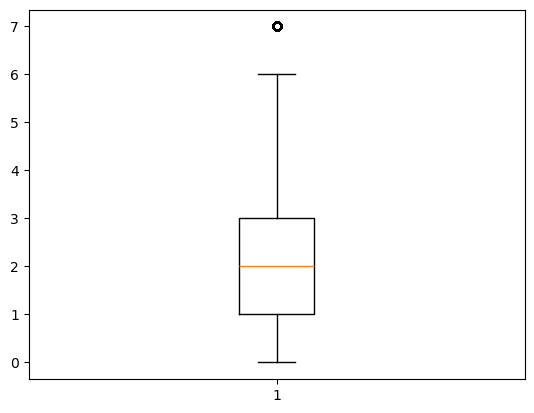

In [9]:
plt.boxplot(Data_Frame["NrSiblings"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24cca1331d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24cca1337a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cca0e3ce0>],
 'medians': [<matplotlib.lines.Line2D at 0x24cca133bf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cca133e90>],
 'means': []}

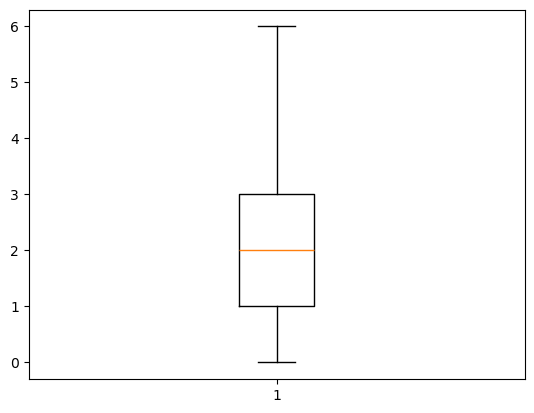

In [10]:
Q1_Value = Data_Frame["NrSiblings"].quantile(0.25)
Q3_Value = Data_Frame["NrSiblings"].quantile(0.75)
IQR_Value = Q3_Value - Q1_Value
Lower_Bound = Q1_Value - (1.5 * IQR_Value)
Upper_Bound = Q3_Value + (1.5 * IQR_Value)
Out_Liers = Data_Frame[(Data_Frame["NrSiblings"] < Lower_Bound) | (Data_Frame["NrSiblings"] > Upper_Bound)]
Data_Frame = Data_Frame[~((Data_Frame["NrSiblings"] < Lower_Bound) | (Data_Frame["NrSiblings"] > Upper_Bound))]
plt.boxplot(Data_Frame["NrSiblings"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24cca1c2180>,
 'caps': [<matplotlib.lines.Line2D at 0x24cca0ff230>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cca1c1f40>],
 'medians': [<matplotlib.lines.Line2D at 0x24cca1c2ab0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cca1c2cc0>],
 'means': []}

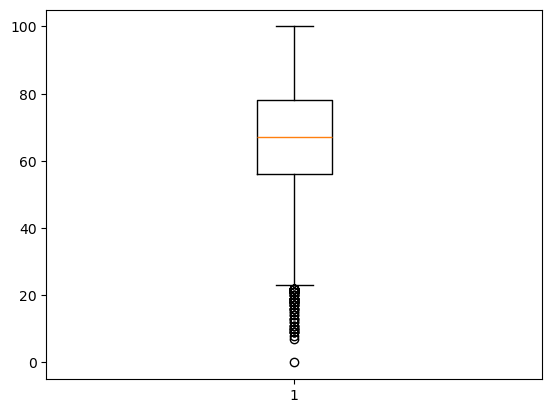

In [11]:
plt.boxplot(Data_Frame["MathScore"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24cca203cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x24cca9342f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cca203a40>],
 'medians': [<matplotlib.lines.Line2D at 0x24cca9348c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cca934b60>],
 'means': []}

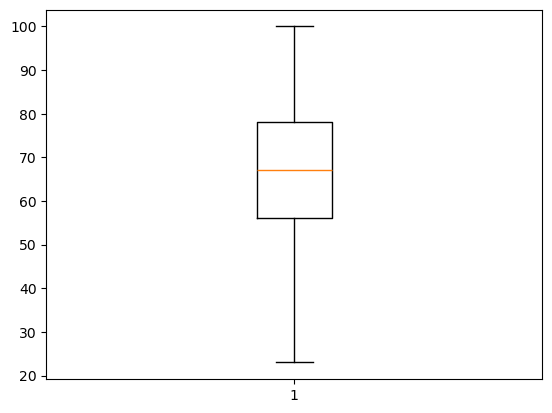

In [12]:
Q1_Value = Data_Frame["MathScore"].quantile(0.25)
Q3_Value = Data_Frame["MathScore"].quantile(0.75)
IQR_Value = Q3_Value - Q1_Value
Lower_Bound = Q1_Value - (1.5 * IQR_Value)
Upper_Bound = Q3_Value + (1.5 * IQR_Value)
Out_Liers = Data_Frame[(Data_Frame["MathScore"] < Lower_Bound) | (Data_Frame["MathScore"] > Upper_Bound)]
Data_Frame = Data_Frame[~((Data_Frame["MathScore"] < Lower_Bound) | (Data_Frame["MathScore"] > Upper_Bound))]
plt.boxplot(Data_Frame["MathScore"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24cca9984a0>,
 'caps': [<matplotlib.lines.Line2D at 0x24cca9988c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cca957dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x24cca998e00>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cca9990d0>],
 'means': []}

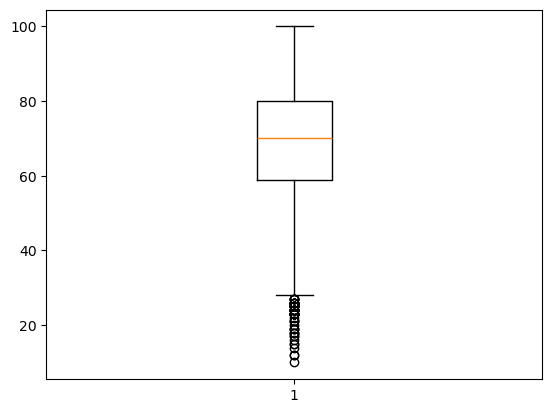

In [13]:
plt.boxplot(Data_Frame["ReadingScore"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24cca9e5bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x24cca181670>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cca9e59a0>],
 'medians': [<matplotlib.lines.Line2D at 0x24cca200440>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cca1ec050>],
 'means': []}

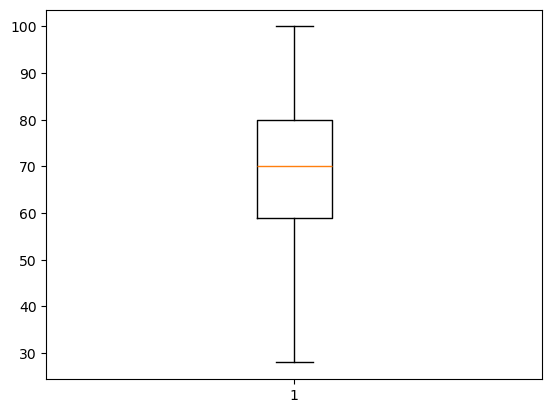

In [14]:
Q1_Value = Data_Frame["ReadingScore"].quantile(0.25)
Q3_Value = Data_Frame["ReadingScore"].quantile(0.75)
IQR_Value = Q3_Value - Q1_Value
Lower_Bound = Q1_Value - (1.5 * IQR_Value)
Upper_Bound = Q3_Value + (1.5 * IQR_Value)
Out_Liers = Data_Frame[(Data_Frame["ReadingScore"] < Lower_Bound) | (Data_Frame["ReadingScore"] > Upper_Bound)]
Data_Frame = Data_Frame[~((Data_Frame["ReadingScore"] < Lower_Bound) | (Data_Frame["ReadingScore"] > Upper_Bound))]
plt.boxplot(Data_Frame["ReadingScore"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24cc9e66db0>,
 'caps': [<matplotlib.lines.Line2D at 0x24cc9e672f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cc9e66ae0>],
 'medians': [<matplotlib.lines.Line2D at 0x24cc9e678c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cc9e67b00>],
 'means': []}

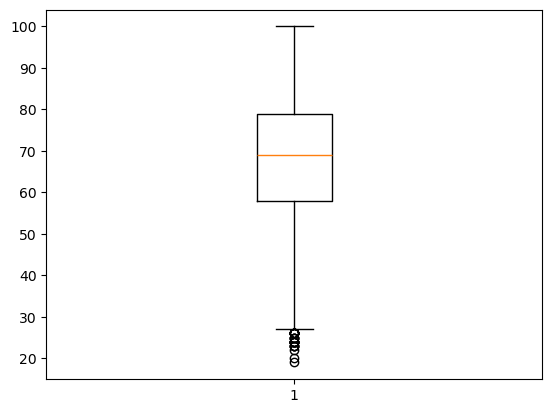

In [15]:
plt.boxplot(Data_Frame["WritingScore"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24cc9ed6600>,
 'caps': [<matplotlib.lines.Line2D at 0x24cc9ed6b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cc9ed6300>],
 'medians': [<matplotlib.lines.Line2D at 0x24cc9ed7140>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cc9ed73e0>],
 'means': []}

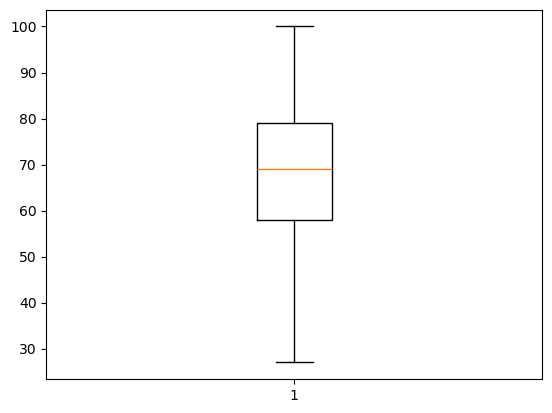

In [16]:
Q1_Value = Data_Frame["WritingScore"].quantile(0.25)
Q3_Value = Data_Frame["WritingScore"].quantile(0.75)
IQR_Value = Q3_Value - Q1_Value
Lower_Bound = Q1_Value - (1.5 * IQR_Value)
Upper_Bound = Q3_Value + (1.5 * IQR_Value)
Out_Liers = Data_Frame[(Data_Frame["WritingScore"] < Lower_Bound) | (Data_Frame["WritingScore"] > Upper_Bound)]
Data_Frame = Data_Frame[~((Data_Frame["WritingScore"] < Lower_Bound) | (Data_Frame["WritingScore"] > Upper_Bound))]
plt.boxplot(Data_Frame["WritingScore"])

In [17]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30185 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30185 non-null  object 
 1   EthnicGroup          30185 non-null  object 
 2   ParentEduc           30185 non-null  object 
 3   LunchType            30185 non-null  object 
 4   TestPrep             30185 non-null  object 
 5   ParentMaritalStatus  30185 non-null  object 
 6   PracticeSport        30185 non-null  object 
 7   NrSiblings           30185 non-null  float64
 8   WklyStudyHours       30185 non-null  object 
 9   MathScore            30185 non-null  int64  
 10  ReadingScore         30185 non-null  int64  
 11  WritingScore         30185 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 3.0+ MB


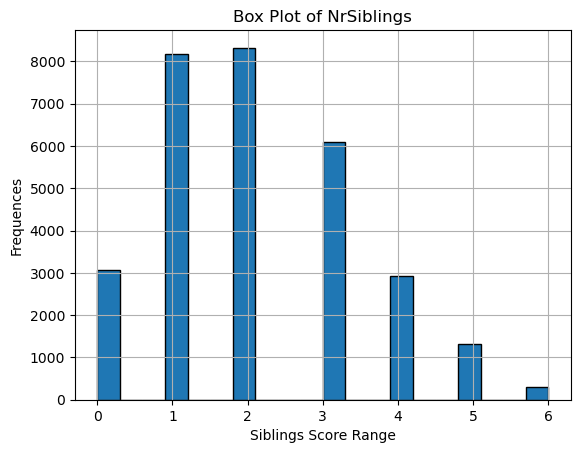

In [18]:
Data_Frame.hist(column=('NrSiblings'), bins=20, edgecolor='black')
plt.title('Box Plot of NrSiblings')
plt.xlabel('Siblings Score Range')
plt.ylabel('Frequences')
plt.show()

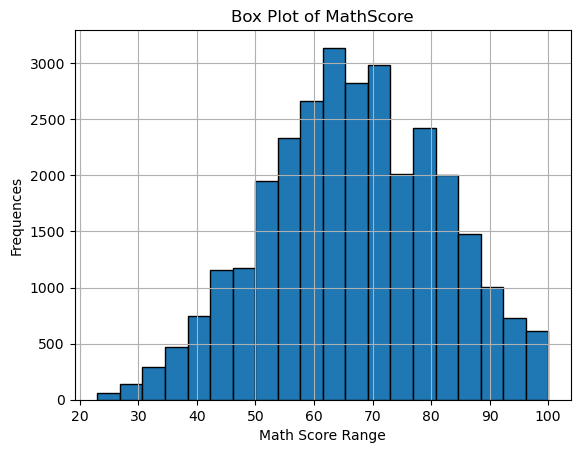

In [19]:
Data_Frame.hist(column=('MathScore'), bins=20, edgecolor='black')
plt.title('Box Plot of MathScore')
plt.xlabel('Math Score Range')
plt.ylabel('Frequences')
plt.show()

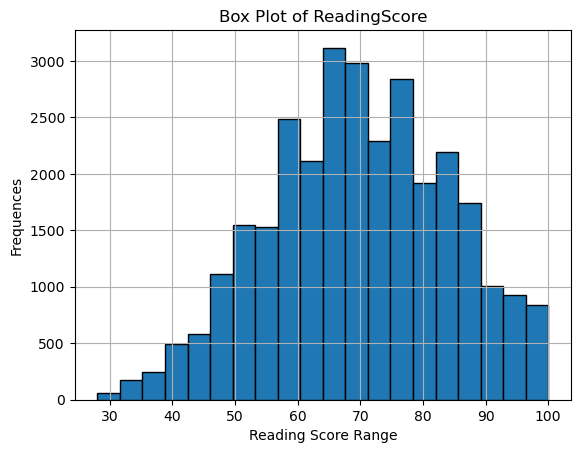

In [20]:
Data_Frame.hist(column=('ReadingScore'), bins=20, edgecolor='black')
plt.title('Box Plot of ReadingScore')
plt.xlabel('Reading Score Range')
plt.ylabel('Frequences')
plt.show()

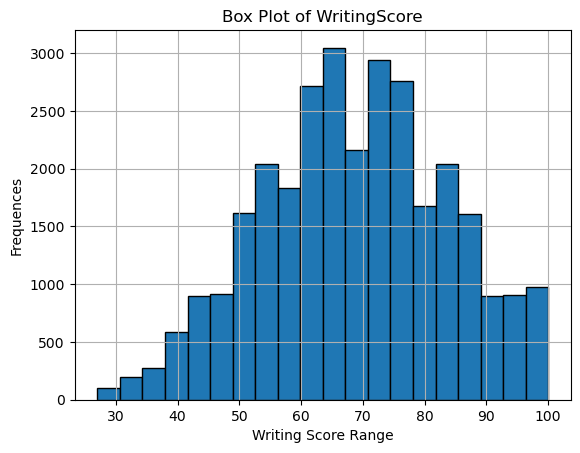

In [21]:
Data_Frame.hist(column=('WritingScore'), bins=20, edgecolor='black')
plt.title('Box Plot of WritingScore')
plt.xlabel('Writing Score Range')
plt.ylabel('Frequences')
plt.show()

In [22]:
Data_Frame = Data_Frame.drop_duplicates()
Data_Frame = Data_Frame.dropna()
Data_Frame.tail(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
30631,male,group E,some high school,standard,none,married,sometimes,3.0,< 5,80,65,66
30632,female,group D,some college,standard,none,married,regularly,3.0,5 - 10,82,88,97
30633,female,group C,master's degree,standard,completed,married,never,2.0,5 - 10,84,99,99
30634,male,group A,associate's degree,free/reduced,completed,married,sometimes,2.0,5 - 10,65,60,60
30635,male,group C,some college,standard,none,married,regularly,2.0,5 - 10,58,53,49
30636,female,group D,high school,standard,none,single,sometimes,2.0,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,1.0,5 - 10,58,53,51
30638,female,group C,high school,free/reduced,completed,married,sometimes,1.0,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,3.0,5 - 10,82,90,93
30640,male,group B,some college,standard,none,married,never,1.0,5 - 10,64,60,58


In [23]:
Data_Frame.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
NrSiblings             float64
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [24]:
Data_Frame["Gender"] = LabelEncoder().fit_transform(Data_Frame["Gender"])
Data_Frame["EthnicGroup"] = LabelEncoder().fit_transform(Data_Frame["EthnicGroup"])
Data_Frame["ParentEduc"] = LabelEncoder().fit_transform(Data_Frame["ParentEduc"])
Data_Frame["LunchType"] = LabelEncoder().fit_transform(Data_Frame["LunchType"])
Data_Frame["TestPrep"] = LabelEncoder().fit_transform(Data_Frame["TestPrep"])
Data_Frame["ParentMaritalStatus"] = LabelEncoder().fit_transform(Data_Frame["ParentMaritalStatus"])
Data_Frame["PracticeSport"] = LabelEncoder().fit_transform(Data_Frame["PracticeSport"])
Data_Frame["WklyStudyHours"] = LabelEncoder().fit_transform(Data_Frame["WklyStudyHours"])
Data_Frame.dtypes

Gender                   int32
EthnicGroup              int32
ParentEduc               int32
LunchType                int32
TestPrep                 int32
ParentMaritalStatus      int32
PracticeSport            int32
NrSiblings             float64
WklyStudyHours           int32
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [25]:
Data_Frame.to_csv("Expanded_Data_With_More_Features_By_Mohammed_Khaled_Shehata_Hussain.csv",index=False)

In [26]:
X1 = Data_Frame.drop(["MathScore"] , axis=1)
Y1 = Data_Frame["MathScore"]
X_Train1,X_Test1,Y_Train1,Y_Test1 = train_test_split(X1 , Y1 , train_size = 0.8 , random_state = 40 , stratify = Y1 , shuffle = True)

In [27]:
Model1 = LinearRegression()
Model1.fit(X_Train1,Y_Train1)
Y_Pred1 = Model1.predict(X_Test1)
print("The Score Of Training =",Model1.score(X_Train1,Y_Train1))
print("The Score Of Testing =",Model1.score(X_Test1,Y_Test1))

The Score Of Training = 0.8581507544219014
The Score Of Testing = 0.8598797378220497


In [28]:
Mse1 = mean_squared_error(Y_Pred1,Y_Test1)
Mae1 = mean_absolute_error(Y_Pred1,Y_Test1)
print("The Mean Square Error = ",Mse1)
print("The Mean Abselute Error = ",Mae1)

The Mean Square Error =  31.77945726389982
The Mean Abselute Error =  4.53117242094353


In [29]:
X2 = Data_Frame.drop(["ReadingScore"] , axis=1)
Y2 = Data_Frame["ReadingScore"]
X_Train2,X_Test2,Y_Train2,Y_Test2 = train_test_split(X2 , Y2 , train_size = 0.8 , random_state = 40 , stratify = Y2 , shuffle = True)

In [30]:
Model2 = LinearRegression()
Model2.fit(X_Train2,Y_Train2)
Y_Pred2 = Model2.predict(X_Test2)
print("The Score Of Training =",Model2.score(X_Train2,Y_Train2))
print("The Score Of Testing =",Model2.score(X_Test2,Y_Test2))

The Score Of Training = 0.9160616629897681
The Score Of Testing = 0.914711735999606


In [31]:
Mse2 = mean_squared_error(Y_Pred2,Y_Test2)
Mae2 = mean_absolute_error(Y_Pred2,Y_Test2)
print("The Mean Square Error = ",Mse2)
print("The Mean Abselute Error = ",Mae2)

The Mean Square Error =  17.84303487966987
The Mean Abselute Error =  3.3915532314685386


In [32]:
X3 = Data_Frame.drop(["WritingScore"] , axis=1)
Y3 = Data_Frame["WritingScore"]
X_Train3,X_Test3,Y_Train3,Y_Test3 = train_test_split(X3 , Y3 , train_size = 0.8 , random_state = 40 , stratify = Y3 , shuffle = True)

In [33]:
Model3 = LinearRegression()
Model3.fit(X_Train3,Y_Train3)
Y_Pred3 = Model3.predict(X_Test3)
print("The Score Of Training =",Model3.score(X_Train3,Y_Train3))
print("The Score Of Testing =",Model3.score(X_Test3,Y_Test3))

The Score Of Training = 0.9340945810586333
The Score Of Testing = 0.9352077663083609


In [34]:
Mse3 = mean_squared_error(Y_Pred3,Y_Test3)
Mae3 = mean_absolute_error(Y_Pred3,Y_Test3)
print("The Mean Square Error = ",Mse3)
print("The Mean Abselute Error = ",Mae3)

The Mean Square Error =  14.821452513278578
The Mean Abselute Error =  3.060805570866094


In [35]:
import pickle
with open("Model_1_of_MathScore.pkl" , "wb") as file :
    pickle.dump(Model1 , file)

In [36]:
import pickle
with open("Model_2_of_ReadingScore.pkl" , "wb") as file :
    pickle.dump(Model2 , file)

In [37]:
import pickle
with open("Model_3_of_WritingScore.pkl" , "wb") as file :
    pickle.dump(Model3 , file)

In [38]:
print("Has Done")

Has Done
